# Satellite Image Segmentation using U-net (FastAI).ipynb

## Initial Setup

In [ ]:
!pip install -Uqq fastai  # upgrade fastai on colab

     |████████████████████████████████| 194kB 20.5MB/s 
     |████████████████████████████████| 51kB 8.7MB/s 


In [3]:
!unzip "/content/drive/My Drive/image_segmentation_u-net/LandCoverData.zip"
!mkdir LandCoverData/images
!mkdir LandCoverData/labels
!mv LandCoverData/M*.jpg LandCoverData/images
!mv LandCoverData/N*.jpg LandCoverData/images
!mv LandCoverData/M*.png LandCoverData/labels
!mv LandCoverData/N*.png LandCoverData/labels

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Libraries

In [1]:
import os
import numpy as np
import glob
import shutil

from fastai.vision.all import *

## Utils

In [ ]:
ROOT_PATH = ""
DATA_PATH = os.path.join(ROOT_PATH, "LandCoverData")
DATA_ZIP_PATH = os.path.join(ROOT_PATH, "LandCoverData.zip")
IMAGE_PATH = os.path.join(ROOT_PATH, "Images")
LABEL_PATH = os.path.join(ROOT_PATH, "Targets")

BATCH_SIZE = 4

## Target loader and Data loader

In [ ]:
## Path for data loader to train.
path = Path(DATA_PATH)
## Codes are the classes required.
codes = np.array(["building", "woodland", "water", "Background"])

In [ ]:
## get_image_files load data from file paths
fnames = get_image_files(path/"images")
## We also need a function to return the label name from the folder.
def label_func(fn): return path/"labels"/f"{fn.stem}_m{'.png'}"


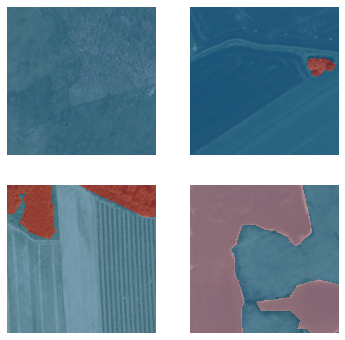

In [ ]:
## SegmentationDataLoaders is used as the data loader.
dls = SegmentationDataLoaders.from_label_func(
    path, bs=BATCH_SIZE, fnames = fnames, label_func = label_func, codes = codes
)
## Showing batches of data (Batch size = 3)
dls.show_batch()

## Learning and Results

In [ ]:
torch.cuda.empty_cache()

In [ ]:
## Since it is image segmentation we use dataloader and resnet18 which is a widely used transfer leanring model.
learn = unet_learner(dls, resnet18)
learn.fine_tune(3)

## For visualizing results
learn.show_results( )


In [ ]:
learn.show_results( )


In [ ]:
learn.show_results(1)


In [ ]:
learn.show_results()

In [ ]:
learn.show_results()